## 1. Data Preprocessing

### 1.1 Import Libraries

In [84]:
# Computation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import time
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# Metrics
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import pylab as pl

# XGBoost
import xgboost as xgb

### 1.2 Data Preprocessing

In [161]:
# Read the dataset
df = pd.read_csv('final_data.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
df.head(5)

,Full_Name,Primary Job Title,Gender,Biography,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,...,logistics_dummy,other_dummy,Masters,Bachelors,Phd,Computer Science,Business,Arts,Engineering,ivy_league
0,JB Straubel,Co-Founder and CTO,Male,The story of JB Straubel's career started at a...,100,2,1.0,1.0,0.0,0.0,...,0,0,1,1,0,1,1,1,1,1
1,Mark Zuckerberg,Founder & CEO,Male,Mark Zuckerberg is the founder and CEO of Face...,"19,678",10,6.0,7.0,0.0,0.0,...,0,1,1,1,0,1,1,1,1,1
2,Ross Mason,Founder and VP of Product Strategy,Male,"Created the Mule Project, Founded MuleSoft, go...",128,1,6.0,7.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,Rahul Gandhi,Co-Founder & SVP of Finance Operations,Male,Rahul is a Co-founder & Senior Vice President ...,861,1,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1,1,1,1
4,Sam Rosen,Founder & CEO,Male,Sam Rosen is Founder & CEO at MakeSpace.com,15,3,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18446 entries, 0 to 18445
Data columns (total 55 columns):
Full_Name                          18446 non-null object
Primary Job Title                  18446 non-null object
Gender                             18446 non-null object
Biography                          18446 non-null object
Number of News Articles            18446 non-null object
Number of Founded Organizations    18446 non-null int64
Number of Portfolio Companies      18446 non-null float64
Number of Investments_x            18446 non-null float64
Number of Partner Investments      18446 non-null float64
Number of Lead Investments_x       18446 non-null float64
Number of Exits_x                  18446 non-null float64
Number of Events_x                 18446 non-null float64
Categories                         18446 non-null object
Headquarters Location              18446 non-null object
Operating Status                   18446 non-null object
Founded Date                   

In [164]:
df.shape

(18446, 55)

In [165]:
df.columns

Index(['Full_Name', 'Primary Job Title', 'Gender', 'Biography',
       'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       'Headquarters Location', 'Operating Status', 'Founded Date',
       'Closed Date', 'Company Type', 'Number of Founders',
       'Number of Employees', 'Number of Funding Rounds', 'Funding Status',
       'Last Funding Date', 'Last Funding Amount', 'Last Funding Type',
       'Last Equity Funding Amount', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Funding Amount',
       'Number of Lead Investors', 'Number of Investors', 'Acquisition Status',
       'IPO Status', 'IPO Date', 'Number of Events_y', 'Success_all',
       'tech_dummy', 'health_dummy', 'finance_dummy', 'travel_dummy',
       'media_marketing_dummy', 'energy_d

In [166]:
# Replace the headquarter location with the frequency of that headquarter
df1 = (df['Headquarters Location'].value_counts().reset_index(name='hq_frequency')
                                                .rename(columns={'index': 'Headquarters Location'}))
df = pd.merge(df, df1, on=['Headquarters Location'], how='left')

In [167]:
# df_main contains the main numerical features that will go into our machine learning models
df_main = df.drop(['Full_Name', 'Primary Job Title', 'Biography', 'Categories', 'Headquarters Location',
                   'Number of Lead Investments_x', 'Number of Partner Investments', 'Last Equity Funding Amount',
                    'Total Equity Funding Amount', 'IPO Status', 'other_dummy', 'Bachelors',
                  'Operating Status','Founded Date', 'Closed Date', 'Company Type', 'Funding Status', 'Last Funding Type',
                   'Last Equity Funding Type','Number of News Articles', 'Number of Employees', 'Acquisition Status',
                  'Last Funding Date', 'IPO Date', 'Number of Events_y'], axis = 1)

In [168]:
df_main.head()

,Gender,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Exits_x,Number of Events_x,Number of Founders,Number of Funding Rounds,Last Funding Amount,Total Funding Amount,...,retail_dummy,logistics_dummy,Masters,Phd,Computer Science,Business,Arts,Engineering,ivy_league,hq_frequency
0,Male,2,1.0,1.0,0.0,1.0,4.0,25,"$1,700,000,000","$12,002,467,530",...,0,0,1,0,1,1,1,1,1,460
1,Male,10,6.0,7.0,0.0,5.0,5.0,11,"$1,500,000,000","$2,335,700,000",...,0,0,1,0,1,1,1,1,1,124
2,Male,1,6.0,7.0,1.0,5.0,2.0,7,"$128,000,000","$259,000,000",...,0,0,0,0,0,0,0,0,0,2915
3,Male,1,0.0,0.0,0.0,0.0,3.0,4,"$30,000,000","$57,600,000",...,1,0,1,0,0,1,1,1,1,1809
4,Male,3,1.0,1.0,0.0,1.0,3.0,4,"$30,000,000","$57,600,000",...,1,0,1,0,0,0,0,0,0,1809


#### Gender
1 is Male and 0 is Female

In [169]:
df_main['Male'] = np.where(df_main['Gender'] == 'Male', 1, 0)
df_main.drop('Gender', axis = 1, inplace = True)

#### Last Funding Amount

Extract the funding dollar amount from the original strings

In [170]:
df_main['Last Funding Amount'] = df_main['Last Funding Amount'].str.extract('([0-9.,]+)')
df_main['Last Funding Amount'] = df_main['Last Funding Amount'].str.replace(',', '')
df_main['Last Funding Amount'] = df_main['Last Funding Amount'].astype(float)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### Total Funding Amount

In [171]:
df_main['Total Funding Amount'] = df_main['Total Funding Amount'].str.extract('([0-9.,]+)')
df_main['Total Funding Amount'] = df_main['Total Funding Amount'].str.replace(',', '')
df_main['Total Funding Amount'] = df_main['Total Funding Amount'].astype(float)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### Values of all columns

Check ranges of all numerical columns

In [172]:
df_main.describe()

,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Exits_x,Number of Events_x,Number of Founders,Number of Funding Rounds,Last Funding Amount,Total Funding Amount,Number of Lead Investors,...,logistics_dummy,Masters,Phd,Computer Science,Business,Arts,Engineering,ivy_league,hq_frequency,Male
count,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,1.844600e+04,1.844600e+04,18446.000000,...,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000
mean,1.315353,0.245582,0.268134,0.040280,0.357855,2.426054,2.631465,4.714847e+07,3.606993e+07,1.172829,...,0.096227,0.482977,0.053128,0.236745,0.357096,0.296758,0.511168,0.144801,778.203188,0.896455
std,0.697461,1.698588,1.938493,0.473366,1.111774,1.165480,1.759468,3.684594e+09,2.784514e+08,1.373391,...,0.294910,0.499724,0.224295,0.425096,0.479157,0.456841,0.499889,0.351910,1062.914522,0.304678
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.450000e+05,9.000000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.700000e+06,4.122500e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,206.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.100000e+07,2.000000e+07,2.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1809.000000,1.000000
max,11.000000,98.000000,112.000000,37.000000,27.000000,11.000000,25.000000,5.000000e+11,1.573790e+10,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2915.000000,1.000000


#### Min-Max Scaler

Scale the features

In [173]:
sc = MinMaxScaler()
scaled_values = sc.fit_transform(df_main) 
df_main.loc[:,:] = scaled_values

In [174]:
# Now all features have max of 1 and min of 0
df_main.describe()

,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Exits_x,Number of Events_x,Number of Founders,Number of Funding Rounds,Last Funding Amount,Total Funding Amount,Number of Lead Investors,...,logistics_dummy,Masters,Phd,Computer Science,Business,Arts,Engineering,ivy_league,hq_frequency,Male
count,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,1.844600e+04,18446.000000,18446.000000,...,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000,18446.000000
mean,0.031535,0.002506,0.002394,0.001089,0.013254,0.220550,0.067978,9.429694e-05,0.002292,0.078189,...,0.096227,0.482977,0.053128,0.236745,0.357096,0.296758,0.511168,0.144801,0.266714,0.896455
std,0.069746,0.017333,0.017308,0.012794,0.041177,0.105953,0.073311,7.369189e-03,0.017693,0.091559,...,0.294910,0.499724,0.224295,0.425096,0.479157,0.456841,0.499889,0.351910,0.364761,0.304678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,8.900000e-07,0.000057,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011668,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.041667,5.400000e-06,0.000262,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.070350,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.083333,2.200000e-05,0.001271,0.133333,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.620453,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
# Impute NaN values with 0
df_main.fillna(0,inplace=True)

## 2. Linear Model and Forward Stepwise Subset Selection

### 2.1 Simple OLS Model

In [176]:
# Linear regression to check correlation
X = df_main.drop(['Success_all'], axis = 1)
y = df_main['Success_all']

In [177]:
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.564     
Dependent Variable:     Success_all          AIC:                    15113.4760
Date:                   2019-04-28 19:59     BIC:                    15348.1541
No. Observations:       18446                Log-Likelihood:         -7526.7   
Df Model:               30                   F-statistic:            797.5     
Df Residuals:           18416                Prob (F-statistic):     0.00      
R-squared:              0.565                Scale:                  0.13263   
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Number of Founded Organizations -0.2016   0.0400 -5.0345 0.0000 -0.2801 -0.1231
Number of Portfolio Companies    1.9680   1.2872  1.5289 0.1263 

In [178]:
feature_list = list(X.columns)

In [179]:
def plot_corr(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

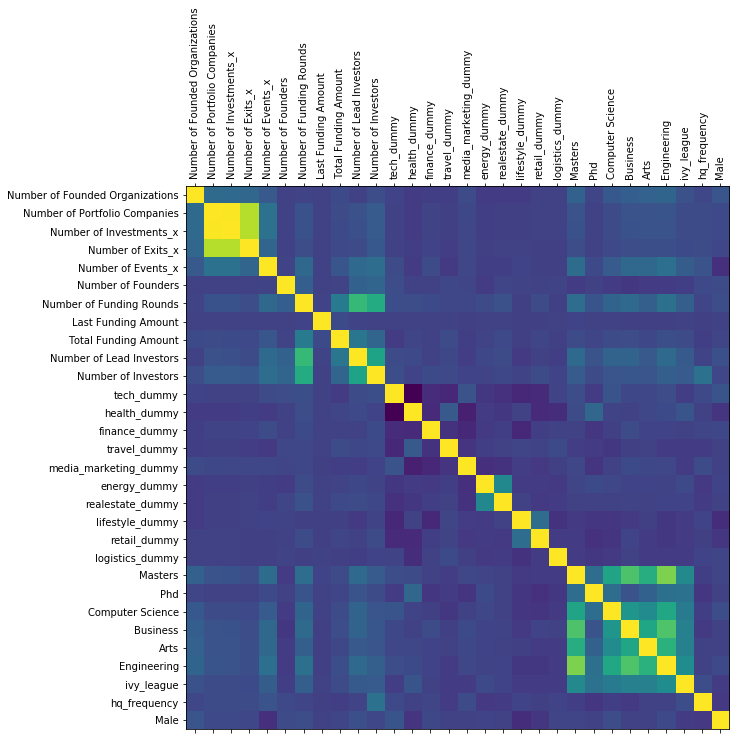

In [180]:
# Show correlation of all features
plot_corr(df_main.drop(['Success_all'], axis = 1))

### 2.2 BASELINE MODEL: Forward Stepwise Subset Selection for OLS

Based on OLS

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [291]:
# Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
def processSubset(feature_list):
    model = sm.OLS(y_train,X_train[list(feature_list)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_list)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [292]:
def forward(predictors):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    return best_model

In [293]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X_train.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  


Processed  30 models on 1 predictors in 0.18445611000061035 seconds.
Processed  29 models on 2 predictors in 0.16364336013793945 seconds.
Processed  28 models on 3 predictors in 0.19009995460510254 seconds.
Processed  27 models on 4 predictors in 0.19402551651000977 seconds.
Processed  26 models on 5 predictors in 0.21137094497680664 seconds.
Processed  25 models on 6 predictors in 0.27722787857055664 seconds.
Processed  24 models on 7 predictors in 0.2483668327331543 seconds.
Processed  23 models on 8 predictors in 0.23826098442077637 seconds.
Processed  22 models on 9 predictors in 0.330996036529541 seconds.
Processed  21 models on 10 predictors in 0.38443732261657715 seconds.
Processed  20 models on 11 predictors in 0.35902929306030273 seconds.
Processed  19 models on 12 predictors in 0.38141417503356934 seconds.
Processed  18 models on 13 predictors in 0.4059140682220459 seconds.
Processed  17 models on 14 predictors in 0.3555881977081299 seconds.
Processed  16 models on 15 predict

Text(0,0.5,'RSS')

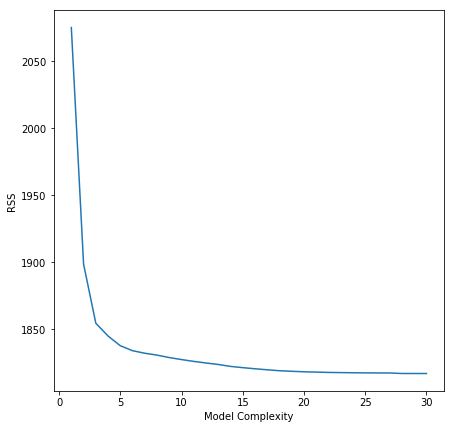

In [294]:
fig, ax = plt.subplots(figsize=(7, 7))
models_fwd['RSS'].plot()
plt.xlabel('Model Complexity')
plt.ylabel('RSS')

In [295]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[10, "model"].params)

-----------------
Foward Selection:
-----------------
Number of Lead Investors           1.953920
Number of Funding Rounds           1.478892
Masters                            0.056535
hq_frequency                      -0.079047
ivy_league                         0.061370
Computer Science                   0.040185
Male                               0.023487
Number of Exits_x                  0.854477
Number of Founded Organizations   -0.178519
Business                           0.029078
dtype: float64


In [296]:
# We choose the 10 features above for our baseline model
chosen_features = list(models_fwd.loc[10, "model"].params.index)

In [297]:
X_train_bestsubset = X_train[chosen_features]
X_test_bestsubset = X_test[chosen_features]

In [298]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [299]:
y_pred_bestsubset = linreg.predict(X_test)
y_pred_bestsubset = np.where(y_pred_bestsubset > 0.5, 1, 0)

In [300]:
#Baseline MSE and Accuracy
print('The baseline MSE is {:.2%}'.format(mean_squared_error(y_test, y_pred_bestsubset)))
print('The baseline accuracy is {:.2%}'.format(sum(y_pred_bestsubset == y_test)/len(y_test)))

The baseline MSE is 17.56%
The baseline accuracy is 82.44%


## 3. Random Forest

Run gridsearch to find optimal hyperparameters on Training Set

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

In [190]:
# Grid Search Cross-validation
parameters = {
     'n_estimators':(10, 30, 50), 
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

rf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, iid=False)
rf.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'n_estimators': (10, 30, 50), 'max_depth': (4, 5, 6, 8, 10, 15), 'min_samples_split': (2, 4, 8), 'min_samples_leaf': (4, 8, 12, 16)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [191]:
print('The accuracy on training set is: ', rf.best_score_)
print('The best parameters are: ', rf.best_params_)

The accuracy on training set is:  0.9130403662976105
The best parameters are:  {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 50}


In [192]:
rf_train = RandomForestClassifier(max_depth = 15,
                                  min_samples_leaf = 4, 
                                  min_samples_split = 8,
                                  n_estimators = 50)
rf_train.fit(X_train, np.ravel(y_train))
y_pred_train = rf_train.predict(X_train)

Text(0.5,0,'Relative Importance')

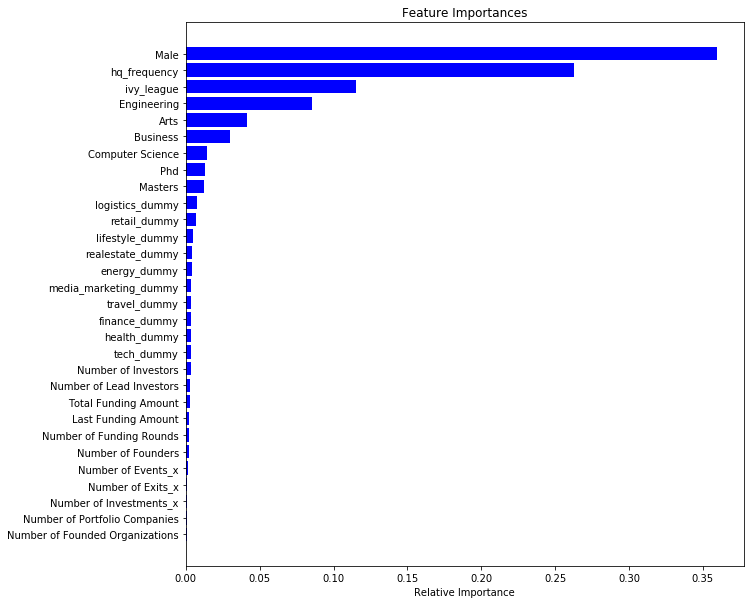

In [193]:
# Importance of features on training set
importances = rf_train.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_list)
plt.xlabel('Relative Importance')

## 4. XGBoost

Objective: optimal hyperparameter searching

In [194]:
def report_best_scores(results, n_top = 3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [195]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=420)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),  
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, 
                            random_state=420, n_iter=100, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

Model with rank: 1
Mean validation score: 0.919 (std: 0.004)
Parameters: {'colsample_bytree': 0.9063511098987536, 'gamma': 0.4738461983918303, 'learning_rate': 0.29617277584129054, 'max_depth': 5, 'n_estimators': 143, 'subsample': 0.6781136557857271}



In [196]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.919 (std: 0.004)
Parameters: {'colsample_bytree': 0.9063511098987536, 'gamma': 0.4738461983918303, 'learning_rate': 0.29617277584129054, 'max_depth': 5, 'n_estimators': 143, 'subsample': 0.6781136557857271}



## 5. Logistic Regression

We run a simple logistic regression to observe the result on the entire training set.

In [197]:
# Simple Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
coef_dict = {}
for c, f in zip(logreg.coef_[0,:],feature_list):
    coef_dict[f] = c

In [200]:
# Coefficients for each feature
coef_dict

{'Arts': -0.044750991111363735,
 'Business': 0.193135911777947,
 'Computer Science': 0.22338590451682291,
 'Engineering': 0.1414911000626613,
 'Last Funding Amount': 0.47074045579130763,
 'Male': 0.28353125444912664,
 'Masters': 0.30308613441550253,
 'Number of Events_x': 1.2322971346269047,
 'Number of Exits_x': 1.1712374520918065,
 'Number of Founded Organizations': -1.0100408934357101,
 'Number of Founders': -0.26392842652377024,
 'Number of Funding Rounds': 9.748453889688799,
 'Number of Investments_x': 1.1299853714648207,
 'Number of Investors': -0.3119047183547719,
 'Number of Lead Investors': 12.814554101442019,
 'Number of Portfolio Companies': 1.282213141367116,
 'Phd': 0.20004151462538092,
 'Total Funding Amount': 3.8085185457044757,
 'energy_dummy': -0.06512719840479281,
 'finance_dummy': -0.22554820048061272,
 'health_dummy': -0.06084326547791157,
 'hq_frequency': -0.5924665568756124,
 'ivy_league': 0.3789985429342101,
 'lifestyle_dummy': -0.16866793423422588,
 'logistics_d

In [205]:
y_pred_log = logreg.predict(X_train)
acc_log_train = logreg.score(X_train, y_train)
print('Accuracy on the training set is {:.2%}'.format(acc_log_train))

Accuracy on the training set is 82.92%


## 6. SVC

In [206]:
parameters = {
    'C': (0.001, 0.01, 0.1, 1, 10),
    'gamma': (0.001, 0.01, 0.1, 1)
}

svc_search = GridSearchCV(SVC(), parameters, cv=5, iid=False)
svc_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'C': (0.001, 0.01, 0.1, 1, 10), 'gamma': (0.001, 0.01, 0.1, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [207]:
svc_search.best_score_, svc_search.best_params_

(0.8313583815028902, {'C': 10, 'gamma': 0.1})

In [208]:
svc = SVC(C = 10, gamma = 0.1)
svc.fit(X_train, np.ravel(y_train))
y_pred_svc = svc.predict(X_train)

acc_svc_train = svc.score(X_train, y_train)
print('Accuracy on the training set is {:.2%}'.format(acc_svc_train))

Accuracy on the training set is 84.96%


## 7. K-fold Cross-validation

#### LOGISTIC REGRESSION

In [213]:
kf = KFold(n_splits= 10, random_state = 420, shuffle = False)
kf.get_n_splits(X_train)

10

In [214]:
X_train.reset_index(inplace = True)
y_train = y_train.reset_index()
y_train.drop('index', axis = 1, inplace = True)

In [230]:
def scoring(classifier):
    MSE_list = list()
    Accuracy_list = list()
    F1_list = list()
    Precision_list = list()
    Recall_list = list()
    for train_index, test_index in kf.split(X_train):
        X_train_val, X_test_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_val, y_test_val = y_train.iloc[train_index], y_train.iloc[test_index]
        classifier.fit(X_train_val, np.ravel(y_train_val))
        y_pred_val = classifier.predict(X_test_val)
        MSE = mean_squared_error(y_test_val, y_pred_val)
        MSE_list.append(MSE)
        Accuracy = accuracy_score(y_test_val, y_pred_val)
        Accuracy_list.append(Accuracy)
        Precision = precision_score(y_test_val, y_pred_val)
        Precision_list.append(Accuracy)
        Recall = recall_score(y_test_val, y_pred_val)
        Recall_list.append(Recall)
        F1 = f1_score(y_test_val, y_pred_val)
        F1_list.append(F1)
    return np.mean(np.array(MSE_list)), np.mean(np.array(Accuracy_list)), np.mean(np.array(Precision_list)), np.mean(np.array(Recall_list)), np.mean(np.array(F1_list))

In [231]:
mse_logreg, accuracy_logreg, precision_logreg, recall_logreg, f1_logreg = scoring(LogisticRegression())

In [232]:
print(mse_logreg)

0.17290697528619614


#### RANDOM FOREST

In [234]:
mse_rf, accuracy_rf, precision_rf, recall_rf, f1_rf = scoring(RandomForestClassifier(max_depth = 15,
                                                                          min_samples_leaf = 4, min_samples_split = 8,
                                                                         n_estimators = 50))

In [235]:
print(mse_rf)

0.08587534847173983


#### SVC

In [236]:
mse_svc, accuracy_svc, precision_svc, recall_svc, f1_svc = scoring(SVC(C = 10, gamma = 0.1))

In [237]:
print(mse_svc)

0.16929300465186264


#### XGBOOST

In [238]:
mse_xgbc, accuracy_xgbc, precision_xgbc, recall_xgbc, f1_xgbc = scoring(xgb.XGBClassifier(n_estimators=143, 
                                                                                          max_depth = 5, 
                                                                                          learning_rate = 0.29617277584129054,
                                                                                          gamma = 0.4738461983918303, 
                                                                                          subsample = 0.6781136557857271,
                                                                                          colsample_bytree =  0.9063511098987536))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

In [239]:
print("MSE of Cross-Validated Logistic Regression is {:.2%}".format(mse_logreg))
print("MSE of Cross-Validated XGBoost is {:.2%}".format(mse_xgbc))
print("MSE of Cross-Validated Random Forest is {:.2%}".format(mse_rf))
print("MSE of Cross-Validated Support Vector Classifier is {:.2%}".format(mse_svc))

MSE of Cross-Validated Logistic Regression is 17.29%
MSE of Cross-Validated XGBoost is 7.58%
MSE of Cross-Validated Random Forest is 8.59%
MSE of Cross-Validated Support Vector Classifier is 16.93%


In [240]:
print("Accuracy of Cross-Validated Logistic Regression is {:.2%}".format(accuracy_logreg))
print("Accuracy of Cross-Validated XGBoost is {:.2%}".format(accuracy_xgbc))
print("Accuracy of Cross-Validated Random Forest is {:.2%}".format(accuracy_rf))
print("Accuracy of Cross-Validated Support Vector Classifier is {:.2%}".format(accuracy_svc))

Accuracy of Cross-Validated Logistic Regression is 82.71%
Accuracy of Cross-Validated XGBoost is 92.42%
Accuracy of Cross-Validated Random Forest is 91.41%
Accuracy of Cross-Validated Support Vector Classifier is 83.07%


In [241]:
print("F1-Score of Cross-Validated Logistic Regression is {:.2%}".format(f1_logreg))
print("F1-Score of Cross-Validated XGBoost is {:.2%}".format(f1_xgbc))
print("F1-Score of Cross-Validated Random Forest is {:.2%}".format(f1_rf))
print("F1-Score of Cross-Validated Support Vector Classifier is {:.2%}".format(f1_svc))

F1-Score of Cross-Validated Logistic Regression is 67.67%
F1-Score of Cross-Validated XGBoost is 87.26%
F1-Score of Cross-Validated Random Forest is 85.29%
F1-Score of Cross-Validated Support Vector Classifier is 68.83%


In [242]:
metrics_data = [['Logistic Regression', mse_logreg, accuracy_logreg, precision_logreg, recall_logreg, f1_logreg], 
        ['XGBoost', mse_xgbc, accuracy_xgbc, precision_xgbc, recall_xgbc, f1_xgbc], 
        ['Random Forest', mse_rf, accuracy_rf, precision_rf, recall_rf, f1_rf],
        ['Support Vector Classifier', mse_svc, accuracy_svc, precision_svc, recall_svc, f1_svc]]

In [243]:
# Create the pandas DataFrame 
metrics_data = pd.DataFrame(metrics_data, columns = ['Name', 'MSE', 'Accuracy', 'Precision', 'Recall', 'F1-Score']) 

In [244]:
metrics_data

,Name,MSE,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.172907,0.827093,0.827093,0.597859,0.676666
1,XGBoost,0.075755,0.924245,0.924245,0.857003,0.872584
2,Random Forest,0.085875,0.914125,0.914125,0.822116,0.852860
3,Support Vector Classifier,0.169293,0.830707,0.830707,0.617855,0.688341


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


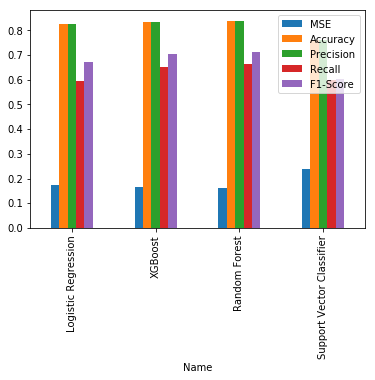

In [626]:
metrics_data.plot(x="Name", y=["MSE", "Accuracy", "Precision", "Recall", "F1-Score"], kind="bar")

##  8.CHOICE 1: RANDOM FOREST

Train on entire dataset and predictions on test set

In [302]:
rf_final = RandomForestClassifier(max_depth = 15,
            min_samples_leaf = 4,
            min_samples_split = 8,
            n_estimators = 50)
rf_final.fit(X_train, np.ravel(y_train))
y_pred = rf.predict(X_test)

In [304]:
print("Accuracy of Test Set using Random Forest is {:.2%}".format(rf_final.score(X_test, y_test)))
print("MSE of Test Set using Random Forest is {:.2%}".format(mean_squared_error(y_test, y_pred)))

Accuracy of Test Set using Random Forest is 90.89%
MSE of Test Set using Random Forest is 8.85%


Text(0.5,0,'Relative Importance')

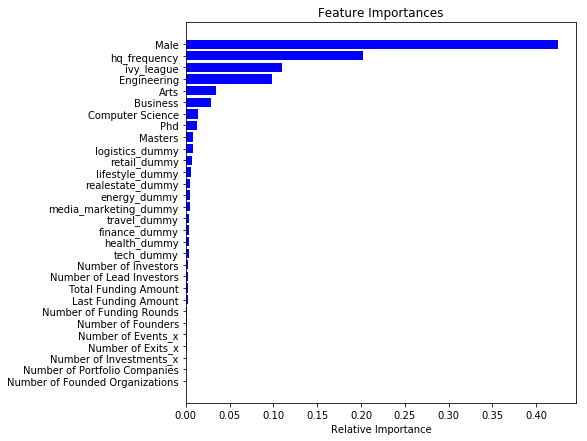

In [249]:
importances = rf_final.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_list)
plt.xlabel('Relative Importance')

In [252]:
auc_rf = roc_auc_score(np.squeeze(y_test), y_pred)
print(auc_rf)

0.886272961809031


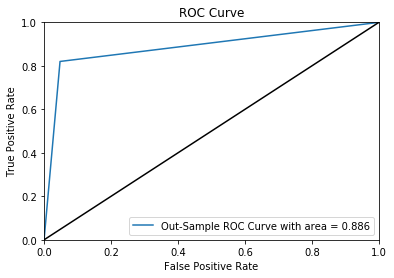

In [253]:
(fpr, tpr, thresholds) = roc_curve(y_test, y_pred)
area = auc(fpr,tpr)
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.3f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()

## 9. CHOICE 2: XGBOOST

In [305]:
xgbc_final = xgb.XGBClassifier(n_estimators=143, 
                               max_depth = 5, 
                               learning_rate = 0.29617277584129054,
                               gamma = 0.4738461983918303, 
                               subsample = 0.6781136557857271,
                               colsample_bytree =  0.9063511098987536)
xgbc_final.fit(X_train, np.ravel(y_train))
y_pred = xgbc_final.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [306]:
print("Accuracy of Test Set using XGBoost is {:.2%}".format(xgbc_final.score(X_test, y_test)))
print("MSE of Test Set using XGBoost is {:.2%}".format(mean_squared_error(y_test, y_pred)))

Accuracy of Test Set using XGBoost is 92.65%
MSE of Test Set using XGBoost is 7.35%


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [258]:
auc_xgbc = roc_auc_score(np.squeeze(y_test), y_pred)
print(auc_xgbc)

0.9091404917316341


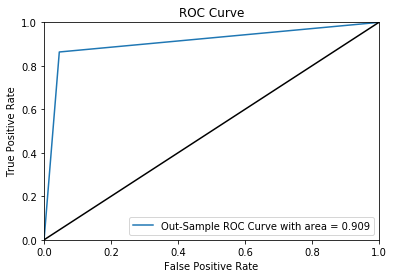

In [259]:
(fpr, tpr, thresholds) = roc_curve(y_test, y_pred)
area = auc(fpr,tpr)
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.3f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()

## 10. CONCLUSION

* Our 2 choices (Random Forest, XGBoost) beats the baseline MSE & Accuracy
* Random Forest is easier to run and gives feature importance, XGBoost is more accurate